Import Necessary Libraries

In [1]:
import requests
import pandas as pd
import numpy as nps

In [2]:
# API key and endpoint
API_KEY = "024ab92f-0036-45ec-81c6-aa7bae283c49"
API_URL = "https://content.guardianapis.com/search"

In [3]:
params = {
    "api-key": API_KEY,
    "section": "commentisfree",
    "tag": "tone/editorials",
    "page-size": 10,
    "show-fields": "headline,trailText,body",
    "page": 1
}

In [4]:
# List to store all articles
all_articles = []

# Fetch articles from multiple pages
for page in range(1, 6):  # Fetch 5 pages (adjust as needed)
    print(f"Fetching page {page}...")
    params["page"] = page  # Update the page number

    # Make the API request
    response = requests.get(API_URL, params=params)
    data = response.json()

    # Extract articles from the current page
    articles = data.get("response", {}).get("results", [])

    # If no articles are returned, stop the loop
    if not articles:
        print("No more articles found.")
        break

    # Process each article
    for article in articles:
        fields = article.get("fields", {})
        title = fields.get("headline", "No Title")
        subheading = fields.get("trailText", "No Subheading")
        body = fields.get("body", "No Content")

        # Append the article data to the list
        all_articles.append({
            "Title": title,
            "Subheading": subheading,
            "Article": body
        })

Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...


In [5]:
print("\nExtracted Articles:")
for idx, article in enumerate(all_articles, start=1):
    print(f"\nArticle {idx}:")
    print(f"Title: {article['Title']}")
    print(f"Subheading: {article['Subheading']}")
    print(f"Article: {article['Article']}")  # Print the entire article content


Extracted Articles:

Article 1:
Title: The Guardian view on undercover policing: the struggle for accountability continues
Subheading: <strong>Editorial:</strong> The public inquiry into police spies was brought about by the bravery of the women they abused, as a new documentary shows
Article: <p>Information in the public domain about the undercover policing of protest groups from the late 1960s onwards would not be there were it not for the extraordinary courage of a group of women who were conned by officers into long-term sexual relationships. It is more than a decade since the investigation of this, and other wrongful actions, by undercover units was taken over by a judge-led public inquiry. Following revelations that officers had spied on Stephen Lawrence’s family, Theresa May, who was then the home secretary, <a href="https://www.theguardian.com/uk-news/2014/mar/06/stephen-lawrence-theresa-may-inquiry-police">ordered that inquiry</a>.</p> <p>ITV’s new three-part documentary, The

In [6]:
# Convert to DataFrame
df = pd.DataFrame(all_articles)

# Save to Excel
df.to_excel("guardian_editorials.xlsx", index=False)

print(f"\nData saved to guardian_editorials.xlsx. Total articles fetched: {len(all_articles)}")


Data saved to guardian_editorials.xlsx. Total articles fetched: 50


In [7]:
sample_article = """
<p>It is easy to become so used to scientific and social advances that we take them for granted. But sometimes we should pause to celebrate – to feel genuine awe – at the wonders that we have seen. Amid&nbsp;all the wars, the disasters and the crimes of the&nbsp;last half century, we have witnessed nothing short&nbsp;of a miracle.</p>
<p>Vaccination, in addition to clean water, sanitation and improved nutrition, has been one of the greatest contributors to global health. It is responsible for much of the astounding fall in child mortality, which plummeted by 59% between 1990 and 2022. It has saved more than 150 million lives, mostly of infants, <a href="https://www.who.int/news/item/24-04-2024-global-immunization-efforts-have-saved-at-least-154-million-lives-over-the-past-50-years">since </a>the Expanded Programme on Immunisation was launched by the World Health Organization in 1974. Initially designed to protect children against diseases including smallpox, tuberculosis, polio and measles, the scheme has since been extended to cover more pathogens. Then, in 2000, came the Global Alliance for Vaccines and Immunisation (<a href="https://www.gavi.org/">Gavi</a>), a public-private organisation&nbsp;that provides financial and technical support for vaccination in poorer countries and negotiates with manufacturers to lower costs.</p>
<p>The results have been remarkable. Prevention is better – and cheaper and easier – than cure. Smallpox was declared eradicated in 1980. Almost all the world<a href="https://www.who.int/news-room/spotlight/history-of-vaccination/history-of-polio-vaccination"> is now polio-free</a>. Cases of many other diseases have been slashed. Much more can be done: an estimated 5&nbsp;million children have been <a href="https://www.gavi.org/news/media-room/one-year-anniversary-malaria-vaccine-rollout-underscores-remarkable-progress-offers">protected against malaria </a>since routine vaccinations were launched a year ago. And from a scientific perspective, we are entering <a href="https://www.theguardian.com/science/2023/apr/07/covid-vaccines-golden-era-pandemic-techology-diseases">a&nbsp;golden age of vaccines</a>.</p>
<p>Yet this is a dangerous moment in other ways. The climate crisis is spurring disease outbreaks. Conflict has dramatically increased <a href="https://www.theguardian.com/global-development/article/2024/ju
l/15/war-conflict-immunisation-vaccination-vaccine-hesitancy-nutrition-disease-children-who-unicef-measles-hpv">the number of unprotected children</a>. Vaccine <a href="https://www.theguardian.com/commentisfree/2020/nov/22/the-guardian-view-on-coronavirus-and-vaccine-scepticism-time-to-act">scepticism</a> has grown. Now cuts to funding threaten to turn the clock back. The trashing of USAid will hinder delivery and has <a href="https://www.theguardian.com/global-development/2025/feb/02/trump-aid-spending-freeze-halts-leading-mvdp-malaria-vaccine-programme">halted a groundbreaking programme</a> to create new malaria vaccines. Robert F Kennedy Jr – who once claimed that “no vaccine is safe and effective” and who tried to persuade the US government to rescind authorisation for the coronavirus vaccine at the height of the pandemic –&nbsp;was <a href="https://www.theguardian.com/us-news/2025/feb/13/rfk-health-secretary-confirmed">confirmed</a> this week as health secretary.</p>
<p>Now the UK, one of Gavi’s founding donors and the country which has given most to its core programme, is considering <a href="https://www.theguardian.com/society/2025/feb/10/dismay-as-uk-poised-to-cut-funding-for-global-vaccination-group-gavi">a significant cut to its support</a>. This would be a grave error. While some aspects of Gavi’s approach have faced sensible scrutiny in the past, it has vaccinated over 1&nbsp;billion children and done so cost-effectively: 97&nbsp;pence in every pound it is given goes on vaccine programmes. Its success is also evident in the number of countries which have graduated from being beneficiaries to paying their own way; some, including Indonesia, are becoming donors in turn. And Gavi’s stockpiles help to keep people safe in wealthier countries too, as well as ensuring that poorer nations are healthier and more stable.</p>
<p>For all these reasons, Gavi has long enjoyed bipartisan support in the UK, which has given it more than £2bn over the last four years. Now, more than ever, its funding must be sustained. The world is full of apparently intractable conflicts and complex moral dilemmas. Few decisions are truly simple for&nbsp;governments. But this one is a no-brainer. It should astonish us that we can so easily save lives. It should be self-evident that we must continue to seize that opportunity.</p>
<ul> <li><p><em><strong>Do you have an opinion on the issues raised in this article? If you would like to submit a response of up to 300 words by email to be considered for publication in our<a href="https://www.theguardian.com/tone/letters"> letters</a> section, please <a href="mailto:guardian.letters@theguardian.com?body=Please%20include%20your%20name,%20full%20postal%20address%20and%20phone%20number%20with%20your%20letter%20below.%20Letters%20are%20usually%20published%20with%20the%20author%27s%20name%20and%20city/town/village.%20The%20rest%20of%20the%20information%20is%20for%20verification%20only%20and%20to%20contact%20you%20where%20necessary.">click here</a>.</strong></em></p></li> </ul>
"""

Pre Processing Techniques

In [8]:
#Removing HTML Tags

from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

cleaned_text = remove_html_tags(sample_article)
print("Step 1: After removing HTML tags:\n", cleaned_text)

Step 1: After removing HTML tags:
 
It is easy to become so used to scientific and social advances that we take them for granted. But sometimes we should pause to celebrate – to feel genuine awe – at the wonders that we have seen. Amid all the wars, the disasters and the crimes of the last half century, we have witnessed nothing short of a miracle.
Vaccination, in addition to clean water, sanitation and improved nutrition, has been one of the greatest contributors to global health. It is responsible for much of the astounding fall in child mortality, which plummeted by 59% between 1990 and 2022. It has saved more than 150 million lives, mostly of infants, since the Expanded Programme on Immunisation was launched by the World Health Organization in 1974. Initially designed to protect children against diseases including smallpox, tuberculosis, polio and measles, the scheme has since been extended to cover more pathogens. Then, in 2000, came the Global Alliance for Vaccines and Immunisati

In [9]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s.,!?]', '', text)  # Remove special characters except punctuation
    return text.strip()

cleaned_text = clean_text(cleaned_text)
print("Step 2: After cleaning text:\n", cleaned_text)

Step 2: After cleaning text:
 It is easy to become so used to scientific and social advances that we take them for granted. But sometimes we should pause to celebrate  to feel genuine awe  at the wonders that we have seen. Amid all the wars, the disasters and the crimes of the last half century, we have witnessed nothing short of a miracle. Vaccination, in addition to clean water, sanitation and improved nutrition, has been one of the greatest contributors to global health. It is responsible for much of the astounding fall in child mortality, which plummeted by 59 between 1990 and 2022. It has saved more than 150 million lives, mostly of infants, since the Expanded Programme on Immunisation was launched by the World Health Organization in 1974. Initially designed to protect children against diseases including smallpox, tuberculosis, polio and measles, the scheme has since been extended to cover more pathogens. Then, in 2000, came the Global Alliance for Vaccines and Immunisation Gavi, 

In [10]:
#Conversion to lowercase

def to_lowercase(text):
    return text.lower()

cleaned_text = to_lowercase(cleaned_text)
print("Step 3: After converting to lowercase:\n", cleaned_text)

Step 3: After converting to lowercase:
 it is easy to become so used to scientific and social advances that we take them for granted. but sometimes we should pause to celebrate  to feel genuine awe  at the wonders that we have seen. amid all the wars, the disasters and the crimes of the last half century, we have witnessed nothing short of a miracle. vaccination, in addition to clean water, sanitation and improved nutrition, has been one of the greatest contributors to global health. it is responsible for much of the astounding fall in child mortality, which plummeted by 59 between 1990 and 2022. it has saved more than 150 million lives, mostly of infants, since the expanded programme on immunisation was launched by the world health organization in 1974. initially designed to protect children against diseases including smallpox, tuberculosis, polio and measles, the scheme has since been extended to cover more pathogens. then, in 2000, came the global alliance for vaccines and immunisat

In [11]:
import re

def remove_unnecessary_section(text):
    # Remove the "Do you have an opinion..." section (case insensitive)
    text = re.sub(r'do you have an opinion on the issues raised in this article\? if you would like to submit a response of up to 300 words by email to be considered for publication in our letters section, please click here\.', '', text, flags=re.IGNORECASE)
    return text.strip()

cleaned_text = remove_unnecessary_section(cleaned_text)
print("Step 4: After removing unnecessary section:\n", cleaned_text)

Step 4: After removing unnecessary section:
 it is easy to become so used to scientific and social advances that we take them for granted. but sometimes we should pause to celebrate  to feel genuine awe  at the wonders that we have seen. amid all the wars, the disasters and the crimes of the last half century, we have witnessed nothing short of a miracle. vaccination, in addition to clean water, sanitation and improved nutrition, has been one of the greatest contributors to global health. it is responsible for much of the astounding fall in child mortality, which plummeted by 59 between 1990 and 2022. it has saved more than 150 million lives, mostly of infants, since the expanded programme on immunisation was launched by the world health organization in 1974. initially designed to protect children against diseases including smallpox, tuberculosis, polio and measles, the scheme has since been extended to cover more pathogens. then, in 2000, came the global alliance for vaccines and immu

In [12]:
#Sentence split

import nltk
nltk.download('punkt_tab')

def split_sentences(text):
    return nltk.sent_tokenize(text)

sentences = split_sentences(cleaned_text)
print("Step 5: After splitting into sentences:\n", sentences)

Step 5: After splitting into sentences:
 ['it is easy to become so used to scientific and social advances that we take them for granted.', 'but sometimes we should pause to celebrate  to feel genuine awe  at the wonders that we have seen.', 'amid all the wars, the disasters and the crimes of the last half century, we have witnessed nothing short of a miracle.', 'vaccination, in addition to clean water, sanitation and improved nutrition, has been one of the greatest contributors to global health.', 'it is responsible for much of the astounding fall in child mortality, which plummeted by 59 between 1990 and 2022. it has saved more than 150 million lives, mostly of infants, since the expanded programme on immunisation was launched by the world health organization in 1974. initially designed to protect children against diseases including smallpox, tuberculosis, polio and measles, the scheme has since been extended to cover more pathogens.', 'then, in 2000, came the global alliance for vacc

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
#Word Tokenization

def tokenize_text(text):
    return nltk.word_tokenize(text)

tokens = [tokenize_text(sentence) for sentence in sentences]
print("Step 6: After tokenization:\n", tokens)

Step 6: After tokenization:
 [['it', 'is', 'easy', 'to', 'become', 'so', 'used', 'to', 'scientific', 'and', 'social', 'advances', 'that', 'we', 'take', 'them', 'for', 'granted', '.'], ['but', 'sometimes', 'we', 'should', 'pause', 'to', 'celebrate', 'to', 'feel', 'genuine', 'awe', 'at', 'the', 'wonders', 'that', 'we', 'have', 'seen', '.'], ['amid', 'all', 'the', 'wars', ',', 'the', 'disasters', 'and', 'the', 'crimes', 'of', 'the', 'last', 'half', 'century', ',', 'we', 'have', 'witnessed', 'nothing', 'short', 'of', 'a', 'miracle', '.'], ['vaccination', ',', 'in', 'addition', 'to', 'clean', 'water', ',', 'sanitation', 'and', 'improved', 'nutrition', ',', 'has', 'been', 'one', 'of', 'the', 'greatest', 'contributors', 'to', 'global', 'health', '.'], ['it', 'is', 'responsible', 'for', 'much', 'of', 'the', 'astounding', 'fall', 'in', 'child', 'mortality', ',', 'which', 'plummeted', 'by', '59', 'between', '1990', 'and', '2022.', 'it', 'has', 'saved', 'more', 'than', '150', 'million', 'lives', 

In [14]:
#Stopword

from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

tokens = [remove_stopwords(sentence_tokens) for sentence_tokens in tokens]
print("Step 7: After stopword removal:\n", tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...

Step 7: After stopword removal:
 [['easy', 'become', 'used', 'scientific', 'social', 'advances', 'take', 'granted', '.'], ['sometimes', 'pause', 'celebrate', 'feel', 'genuine', 'awe', 'wonders', 'seen', '.'], ['amid', 'wars', ',', 'disasters', 'crimes', 'last', 'half', 'century', ',', 'witnessed', 'nothing', 'short', 'miracle', '.'], ['vaccination', ',', 'addition', 'clean', 'water', ',', 'sanitation', 'improved', 'nutrition', ',', 'one', 'greatest', 'contributors', 'global', 'health', '.'], ['responsible', 'much', 'astounding', 'fall', 'child', 'mortality', ',', 'plummeted', '59', '1990', '2022.', 'saved', '150', 'million', 'lives', ',', 'mostly', 'infants', ',', 'since', 'expanded', 'programme', 'immunisation', 'launched', 'world', 'health', 'organization', '1974.', 'initially', 'designed', 'protect', 'children', 'diseases', 'including', 'smallpox', ',', 'tuberculosis', ',', 'polio', 'measles', ',', 'scheme', 'since', 'extended', 'cover', 'pathogens', '.'], [',', '2000', ',', 'came',


[nltk_data]   Package stopwords is already up-to-date!


In [15]:
'''
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

tokens = [lemmatize_tokens(sentence_tokens) for sentence_tokens in tokens]
print("Step 7: After lemmatization:\n", tokens)
'''
#Pre processing enhancements to better the results obtained
'''
# TF-IDF Weighting
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([" ".join(sentence) for sentence in tokens])
'''
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

# Improved lemmatization with POS tagging
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    pos_tagged_tokens = pos_tag(tokens)
    return [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tagged_tokens]


tokens = [lemmatize_tokens(sentence_tokens) for sentence_tokens in tokens]
print("After improved lemmatization:\n", tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arjun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


After improved lemmatization:
 [['easy', 'become', 'use', 'scientific', 'social', 'advance', 'take', 'grant', '.'], ['sometimes', 'pause', 'celebrate', 'feel', 'genuine', 'awe', 'wonder', 'see', '.'], ['amid', 'war', ',', 'disaster', 'crime', 'last', 'half', 'century', ',', 'witness', 'nothing', 'short', 'miracle', '.'], ['vaccination', ',', 'addition', 'clean', 'water', ',', 'sanitation', 'improve', 'nutrition', ',', 'one', 'great', 'contributor', 'global', 'health', '.'], ['responsible', 'much', 'astound', 'fall', 'child', 'mortality', ',', 'plummet', '59', '1990', '2022.', 'save', '150', 'million', 'life', ',', 'mostly', 'infant', ',', 'since', 'expand', 'programme', 'immunisation', 'launch', 'world', 'health', 'organization', '1974.', 'initially', 'design', 'protect', 'child', 'diseases', 'include', 'smallpox', ',', 'tuberculosis', ',', 'polio', 'measles', ',', 'scheme', 'since', 'extend', 'cover', 'pathogen', '.'], [',', '2000', ',', 'come', 'global', 'alliance', 'vaccine', 'immun

word2vec model

In [16]:
#Word2Vec Embedding

from gensim.models import Word2Vec
import numpy as np
# Train Word2Vec embeddings on the tokenized sentences
word2vec_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)

# Get embeddings for each word
word_embeddings = []
for sentence_tokens in tokens:
    embeddings = [word2vec_model.wv[word] for word in sentence_tokens]
    word_embeddings.append(embeddings)

# Print sample output
print("Step 1: Word2Vec Embeddings for the first sentence:")
print("Tokens:", tokens[0])
print("Embeddings shape for first sentence:", np.array(word_embeddings[0]).shape)
print("Sample embedding for 'easy':", word_embeddings[0][0])

Step 1: Word2Vec Embeddings for the first sentence:
Tokens: ['easy', 'become', 'use', 'scientific', 'social', 'advance', 'take', 'grant', '.']
Embeddings shape for first sentence: (9, 100)
Sample embedding for 'easy': [-4.8060734e-03 -4.3003783e-03 -4.7972151e-03 -9.7753629e-03
 -7.7465759e-04 -7.8331018e-03 -4.8196889e-03 -7.3345234e-03
  9.9085402e-03 -1.3891085e-03 -7.7682678e-03  5.4876129e-03
 -8.0837207e-03 -1.9038800e-03  2.7285409e-03 -7.1054283e-03
 -8.7282918e-03 -6.6997786e-03  7.4405195e-03  8.9918831e-03
  3.9876215e-03  2.4073482e-03  4.1311313e-03 -4.0724156e-03
  9.7541120e-03  6.8775937e-03  4.1115251e-03  8.9304931e-03
 -8.4282858e-03  9.4028597e-04  8.8955583e-03 -9.4785017e-04
 -6.7369873e-03 -2.2673558e-03 -2.8254571e-03 -2.4522024e-03
 -1.8271783e-03  7.2661969e-03 -3.2172221e-04  4.2032250e-03
 -3.7610161e-03  8.1984950e-03 -6.5158689e-03 -9.3507254e-03
 -4.1231439e-03 -7.3648430e-03 -4.8831864e-03  4.7738926e-04
  2.4135993e-03  1.7748766e-03  5.0108442e-03 -1.4

Generating Text Summary using kmeans and cosine similarity

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Flatten the list of word embeddings while keeping track of words
all_words = []
all_embeddings = []

for i, sentence in enumerate(word_embeddings):
    for j, word_emb in enumerate(sentence):
        all_embeddings.append(word_emb)  # Store embedding
        all_words.append(tokens[i][j])   # Store actual word

all_embeddings = np.array(all_embeddings)  # Convert to NumPy array

# Perform KMeans clustering on word embeddings
num_clusters = max(1, len(all_embeddings) // 10)  # Adjust clusters based on dataset size
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(all_embeddings)

# Find representative words for each cluster using cosine similarity
representative_words = []
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]  # Get cluster centroid
    similarities = cosine_similarity([cluster_center], all_embeddings)[0]  # Compute cosine similarity
    closest_word_idx = np.argmax(similarities)  # Find closest word
    representative_words.append(all_words[closest_word_idx])  # Store the actual word

# Extract sentences that contain the representative words
summary_sentences = []
for sentence in tokens:
    if any(word in representative_words for word in sentence):  # Check if key words are in sentence
        summary_sentences.append(" ".join(sentence))

# Generate final summary
word2vec_summary = " ".join(summary_sentences)

Generate extractive summary using TextRank for comparison

In [18]:
# Generate extractive summary using TextRank

!pip install sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer

parser = PlaintextParser.from_string(" ".join(sentences), Tokenizer("english"))
text_rank_summarizer = TextRankSummarizer()
num_sentences = max(1, len(sentences) // 5)
text_rank_summary = " ".join(str(sent) for sent in text_rank_summarizer(parser.document, num_sentences))

Evaluation metrics

In [19]:
# Evaluate with ROUGE scores
!pip install rouge-score
from rouge_score import rouge_scorer

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)

# Compute ROUGE scores
scores = scorer.score(text_rank_summary, word2vec_summary)

# Print results
print("Word2Vec-Based Summary:\n", word2vec_summary)
print("\nProper TextRank-Based Summary:\n", text_rank_summary)
print("\nROUGE Scores:\n")

# Print ROUGE scores with better formatting
for key, value in scores.items():
    print(f"{key.upper()}:")
    print(f"  Precision: {value.precision:.4f}")
    print(f"  Recall: {value.recall:.4f}")
    print(f"  F1-Score: {value.fmeasure:.4f}\n")

Word2Vec-Based Summary:
 easy become use scientific social advance take grant . sometimes pause celebrate feel genuine awe wonder see . amid war , disaster crime last half century , witness nothing short miracle . vaccination , addition clean water , sanitation improve nutrition , one great contributor global health . responsible much astound fall child mortality , plummet 59 1990 2022. save 150 million life , mostly infant , since expand programme immunisation launch world health organization 1974. initially design protect child diseases include smallpox , tuberculosis , polio measles , scheme since extend cover pathogen . , 2000 , come global alliance vaccine immunisation gavi , publicprivate organisation provide financial technical support vaccination poorer country negotiate manufacturer low cost . result remarkable . prevention well cheap easy cure . smallpox declare eradicate 1980. almost world poliofree . case many disease slash . much do estimate 5 million child protect malaria

Output has very low rouge score, so performing Pre processing enhancements to better the results obtained

In [55]:
#removing lemmatization from preprocessing steps since it is a cause for poor summary generation.

In [34]:
#Repeat Word2Vec Embedding

from gensim.models import Word2Vec
import numpy as np
# Train Word2Vec embeddings on the tokenized sentences
word2vec_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)

# Get embeddings for each word
word_embeddings = []
for sentence_tokens in tokens:
    embeddings = [word2vec_model.wv[word] for word in sentence_tokens]
    word_embeddings.append(embeddings)

# Print sample output
print("Step 1: Word2Vec Embeddings for the first sentence:")
print("Tokens:", tokens[0])
print("Embeddings shape for first sentence:", np.array(word_embeddings[0]).shape)
print("Sample embedding for 'easy':", word_embeddings[0][0])

Step 1: Word2Vec Embeddings for the first sentence:
Tokens: ['easy', 'become', 'used', 'scientific', 'social', 'advances', 'take', 'granted', '.']
Embeddings shape for first sentence: (9, 100)
Sample embedding for 'easy': [ 8.8836001e-03  3.0772807e-03 -4.9878203e-04 -4.1248770e-03
  7.2084181e-03 -5.9555429e-03  8.2601542e-03  1.1029041e-03
 -2.5475575e-03  8.6634699e-03  2.3448297e-03  8.7143714e-03
 -1.1821126e-03  4.2626308e-03 -7.0845522e-03  4.9761632e-03
 -4.3869228e-03 -4.8125656e-03 -5.9981514e-03 -2.3860070e-03
  2.5555302e-04  6.4166804e-04  6.8985042e-03  1.7299058e-03
  9.3334407e-04 -2.3845043e-03  7.7000279e-03 -3.7923118e-03
  4.7893524e-03 -5.2864961e-03  1.9647519e-03  3.9146738e-03
 -6.2171873e-03 -1.8946175e-03 -3.4150499e-04  7.8728339e-03
 -9.5477458e-03 -6.2486366e-03  7.4246465e-03 -7.7248956e-03
  3.8808868e-03  6.5733716e-03 -3.0974287e-04 -6.0405876e-03
  8.7080840e-03  1.1402720e-03  4.2927340e-03  8.5786777e-03
  8.1552444e-03  1.4438245e-03  5.1587089e-03 

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Flatten the list of word embeddings while keeping track of words
all_words = []
all_embeddings = []

for i, sentence in enumerate(word_embeddings):
    for j, word_emb in enumerate(sentence):
        all_embeddings.append(word_emb)  # Store embedding
        all_words.append(tokens[i][j])   # Store actual word

all_embeddings = np.array(all_embeddings)  # Convert to NumPy array

# Perform KMeans clustering on word embeddings
num_clusters = max(1, len(all_embeddings) // 10)  # Adjust clusters based on dataset size
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(all_embeddings)

# Find representative words for each cluster using cosine similarity
representative_words = []
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]  # Get cluster centroid
    similarities = cosine_similarity([cluster_center], all_embeddings)[0]  # Compute cosine similarity
    closest_word_idx = np.argmax(similarities)  # Find closest word
    representative_words.append(all_words[closest_word_idx])  # Store the actual word

# Extract sentences that contain the representative words
summary_sentences = []
for sentence in tokens:
    if any(word in representative_words for word in sentence):  # Check if key words are in sentence
        summary_sentences.append(" ".join(sentence))

# Generate final summary
word2vec_summary = " ".join(summary_sentences)

In [36]:
# Evaluate with ROUGE scores
!pip install rouge-score
from rouge_score import rouge_scorer

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)

# Compute ROUGE scores
scores = scorer.score(text_rank_summary, word2vec_summary)

# Print results
print("Word2Vec-Based Summary:\n", word2vec_summary)
print("\nProper TextRank-Based Summary:\n", text_rank_summary)
print("\nROUGE Scores:\n")

# Print ROUGE scores with better formatting
for key, value in scores.items():
    print(f"{key.upper()}:")
    print(f"  Precision: {value.precision:.4f}")
    print(f"  Recall: {value.recall:.4f}")
    print(f"  F1-Score: {value.fmeasure:.4f}\n")

Word2Vec-Based Summary:
 easy become used scientific social advances take granted . sometimes pause celebrate feel genuine awe wonders seen . amid wars , disasters crimes last half century , witnessed nothing short miracle . vaccination , addition clean water , sanitation improved nutrition , one greatest contributors global health . responsible much astounding fall child mortality , plummeted 59 1990 2022. saved 150 million lives , mostly infants , since expanded programme immunisation launched world health organization 1974. initially designed protect children diseases including smallpox , tuberculosis , polio measles , scheme since extended cover pathogens . , 2000 , came global alliance vaccines immunisation gavi , publicprivate organisation provides financial technical support vaccination poorer countries negotiates manufacturers lower costs . results remarkable . prevention better cheaper easier cure . smallpox declared eradicated 1980. almost world poliofree . cases many disease

Still produces faulty output, so moving on to GloVe

In [37]:
import zipfile

with zipfile.ZipFile("C:\\Users\\Arjun\\Downloads\\glove.6B.zip", "r") as zip_ref:
    zip_ref.extractall("./glove")  # Extracts into a folder named 'glove'


In [38]:
import os

# List the extracted files
os.listdir("./glove")

# Check if the file exists
print(os.path.isfile(r"C:\\Users\\Arjun\\Downloads\\glove.6B.zip"))  # Should print True if file exists
print(os.listdir("./glove"))  # List files in the extracted directory

True
['glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.300d.txt', 'glove.6B.50d.txt']


In [39]:
glove_path = r"C:\Users\Arjun\Downloads\glove.6B\glove.6B.100d.txt"

#GloVe Embedding
# Load GloVe embeddings (download from https://nlp.stanford.edu/projects/glove/)
def load_glove_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Path to the GloVe file (e.g., glove.6B.100d.txt)
glove_path = r"C:\Users\Arjun\Downloads\glove.6B\glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_path)

# Function to get word embeddings
def get_word_embedding(word):
    return glove_embeddings.get(word, np.zeros(100))  # Return zero vector if word not found

# Generate embeddings for each word in the sentences
word_embeddings = []
for sentence_tokens in tokens:
    embeddings = [get_word_embedding(word) for word in sentence_tokens]
    word_embeddings.append(embeddings)

# Print sample output
print("Step 1: GloVe Embeddings for the first sentence:")
print("Tokens:", tokens[0])
print("Embeddings shape for first sentence:", np.array(word_embeddings[0]).shape)
print("Sample embedding for 'easy':", word_embeddings[0][0])

Step 1: GloVe Embeddings for the first sentence:
Tokens: ['easy', 'become', 'used', 'scientific', 'social', 'advances', 'take', 'granted', '.']
Embeddings shape for first sentence: (9, 100)
Sample embedding for 'easy': [-5.8672e-01  2.0714e-01  6.4483e-01  1.0251e-01  1.1673e-01  2.3950e-01
 -3.5676e-02  4.4773e-03  3.0814e-01 -1.5759e-01  3.7119e-01  2.7367e-02
 -4.5433e-01 -2.1589e-01  4.7978e-01  2.2122e-01 -2.1001e-03  1.5191e-01
 -2.0388e-01  6.6474e-01  1.9690e-01  5.1996e-01  3.0874e-01 -7.2703e-01
  3.5236e-02  3.7447e-01 -5.1249e-01 -5.7270e-01  5.0029e-02 -6.1550e-01
 -7.0485e-01  5.3403e-01 -1.4686e-01 -2.8848e-01  1.0274e+00  3.2969e-01
 -5.9544e-01 -1.8822e-01  3.0927e-01 -5.0072e-01  1.9450e-01 -3.1115e-01
 -1.3091e-01 -8.1049e-01 -3.2159e-01 -3.9982e-01  5.4259e-01 -3.0070e-01
  1.4922e-01 -6.2730e-01  2.3121e-02  2.4106e-02 -1.1638e-03  8.1257e-01
  5.3335e-01 -2.2063e+00  4.6679e-01  4.4958e-01  1.5249e+00 -2.7112e-01
 -6.1425e-01  1.1719e-01 -2.3773e-01  9.2794e-02  7

In [45]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from rouge_score import rouge_scorer

# Step 1: Flatten word embeddings while keeping track of words
all_words = []
all_embeddings = []

for sentence_index, sentence_tokens in enumerate(tokens):
    for word_index, word in enumerate(sentence_tokens):
        try:
            embedding = word_embeddings[sentence_index][word_index]
            if np.any(embedding):  # Ensure it's not a zero vector
                all_embeddings.append(embedding)
                all_words.append(word)
        except IndexError:
            continue

# Step 2: Convert embeddings to numpy array
all_embeddings = np.array(all_embeddings)

# Step 3: Dynamic KMeans Clustering
num_clusters = max(10, min(30, len(all_embeddings) // 5))  # Dynamic cluster range
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=20, max_iter=500)
kmeans.fit(all_embeddings)

# Step 4: Find representative words using Cosine Similarity
representative_words = []
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    similarities = cosine_similarity([cluster_center], all_embeddings)[0]
    closest_word_idx = np.argmax(similarities)
    representative_words.append(all_words[closest_word_idx])

# Step 5: Calculate Sentence Embeddings by Averaging Word Vectors
sentence_embeddings = []
processed_sentences = []

for sentence in tokens:
    embeddings = [word_embeddings[tokens.index(sentence)][sentence.index(word)] 
                  for word in sentence if word in all_words]
    if embeddings:
        avg_embedding = np.mean(embeddings, axis=0)
        sentence_embeddings.append(avg_embedding)
        processed_sentences.append(" ".join(sentence).lower().strip())  # Store processed version
    else:
        sentence_embeddings.append(np.zeros((all_embeddings.shape[1],)))
        processed_sentences.append(" ".join(sentence).lower().strip())

# Create a mapping of processed sentence to its embedding
sentence_to_embedding = dict(zip(processed_sentences, sentence_embeddings))

# Step 6: Advanced Sentence Selection using MMR
def max_marginal_relevance(sentences, selected_sentences, embeddings, lambda_param=0.9):
    mmr_sentence = None
    max_mmr = -np.inf
    
    for sentence in sentences:
        if sentence in selected_sentences:
            continue
        
        embedding = sentence_to_embedding.get(sentence, np.zeros((all_embeddings.shape[1],)))

        # Compute relevance (similarity to cluster centroids)
        centroid_sim = np.mean([cosine_similarity([embedding], [centroid])[0][0] 
                                for centroid in kmeans.cluster_centers_])

        # Compute redundancy (similarity to already selected sentences)
        if selected_sentences:
            selected_embeddings = [sentence_to_embedding.get(s, np.zeros((all_embeddings.shape[1],)))
                                   for s in selected_sentences]
            redundancy = max([cosine_similarity([embedding], [selected])[0][0] 
                              for selected in selected_embeddings], default=0)
        else:
            redundancy = 0
        
        mmr = lambda_param * centroid_sim - (1 - lambda_param) * redundancy
        if mmr > max_mmr:
            max_mmr = mmr
            mmr_sentence = sentence
            
    return mmr_sentence

# Step 7: Extract Sentences for Summary using Updated MMR
summary_sentences = []
remaining_sentences = processed_sentences.copy()

while len(summary_sentences) < num_clusters and remaining_sentences:
    next_sentence = max_marginal_relevance(remaining_sentences, summary_sentences, sentence_embeddings)
    if next_sentence:
        summary_sentences.append(next_sentence)
        remaining_sentences.remove(next_sentence)

# Step 8: Generate Final Summary
glove_summary = " ".join(summary_sentences)

# Step 9: ROUGE Evaluation against TextRank
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
scores = scorer.score(glove_summary, text_rank_summary)

# Step 10: Print Results
# Explicitly print ROUGE-1 Scores
print("\n=== ROUGE-1 Scores ===")
print("ROUGE-1 measures the overlap of unigrams (single words) between the generated summary and the reference summary.\n")
print(f"  Precision: {scores['rouge1'].precision:.4f} - Fraction of unigrams in the generated summary that are also in the reference.")
print(f"  Recall: {scores['rouge1'].recall:.4f} - Fraction of unigrams in the reference that are also in the generated summary.")
print(f"  F1-Score: {scores['rouge1'].fmeasure:.4f} - Harmonic mean of Precision and Recall.\n")

# Explicitly print ROUGE-2 Scores
print("\n=== ROUGE-2 Scores ===")
print("ROUGE-2 measures the overlap of bigrams (pairs of consecutive words) between the generated summary and the reference summary.\n")
print(f"  Precision: {scores['rouge2'].precision:.4f} - Fraction of bigrams in the generated summary that are also in the reference.")
print(f"  Recall: {scores['rouge2'].recall:.4f} - Fraction of bigrams in the reference that are also in the generated summary.")
print(f"  F1-Score: {scores['rouge2'].fmeasure:.4f} - Harmonic mean of Precision and Recall.\n")




=== ROUGE-1 Scores ===
ROUGE-1 measures the overlap of unigrams (single words) between the generated summary and the reference summary.

  Precision: 0.5412 - Fraction of unigrams in the generated summary that are also in the reference.
  Recall: 0.5541 - Fraction of unigrams in the reference that are also in the generated summary.
  F1-Score: 0.4716 - Harmonic mean of Precision and Recall.


=== ROUGE-2 Scores ===
ROUGE-2 measures the overlap of bigrams (pairs of consecutive words) between the generated summary and the reference summary.

  Precision: 0.2112 - Fraction of bigrams in the generated summary that are also in the reference.
  Recall: 0.2210 - Fraction of bigrams in the reference that are also in the generated summary.
  F1-Score: 0.1897 - Harmonic mean of Precision and Recall.



Changing the lambda parameter

In [44]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from rouge_score import rouge_scorer

# Step 1: Flatten word embeddings while keeping track of words
all_words = []
all_embeddings = []

for sentence_index, sentence_tokens in enumerate(tokens):
    for word_index, word in enumerate(sentence_tokens):
        try:
            embedding = word_embeddings[sentence_index][word_index]
            if np.any(embedding):  # Ensure it's not a zero vector
                all_embeddings.append(embedding)
                all_words.append(word)
        except IndexError:
            continue

# Step 2: Convert embeddings to numpy array
all_embeddings = np.array(all_embeddings)

# Step 3: Dynamic KMeans Clustering
num_clusters = max(10, min(30, len(all_embeddings) // 5))  # Dynamic cluster range
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=20, max_iter=500)
kmeans.fit(all_embeddings)

# Step 4: Find representative words using Cosine Similarity
representative_words = []
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    similarities = cosine_similarity([cluster_center], all_embeddings)[0]
    closest_word_idx = np.argmax(similarities)
    representative_words.append(all_words[closest_word_idx])

# Step 5: Calculate Sentence Embeddings by Averaging Word Vectors
sentence_embeddings = []
processed_sentences = []

for sentence in tokens:
    embeddings = [word_embeddings[tokens.index(sentence)][sentence.index(word)] 
                  for word in sentence if word in all_words]
    if embeddings:
        avg_embedding = np.mean(embeddings, axis=0)
        sentence_embeddings.append(avg_embedding)
        processed_sentences.append(" ".join(sentence).lower().strip())  # Store processed version
    else:
        sentence_embeddings.append(np.zeros((all_embeddings.shape[1],)))
        processed_sentences.append(" ".join(sentence).lower().strip())

# Create a mapping of processed sentence to its embedding
sentence_to_embedding = dict(zip(processed_sentences, sentence_embeddings))

# Step 6: Advanced Sentence Selection using MMR
def max_marginal_relevance(sentences, selected_sentences, embeddings, lambda_param=0.9):
    mmr_sentence = None
    max_mmr = -np.inf
    
    for sentence in sentences:
        if sentence in selected_sentences:
            continue
        
        embedding = sentence_to_embedding.get(sentence, np.zeros((all_embeddings.shape[1],)))

        # Compute relevance (similarity to cluster centroids)
        centroid_sim = np.mean([cosine_similarity([embedding], [centroid])[0][0] 
                                for centroid in kmeans.cluster_centers_])

        # Compute redundancy (similarity to already selected sentences)
        if selected_sentences:
            selected_embeddings = [sentence_to_embedding.get(s, np.zeros((all_embeddings.shape[1],)))
                                   for s in selected_sentences]
            redundancy = max([cosine_similarity([embedding], [selected])[0][0] 
                              for selected in selected_embeddings], default=0)
        else:
            redundancy = 0
        
        mmr = lambda_param * centroid_sim - (1 - lambda_param) * redundancy
        if mmr > max_mmr:
            max_mmr = mmr
            mmr_sentence = sentence
            
    return mmr_sentence

# Step 7: Extract Sentences for Summary using Updated MMR
summary_sentences = []
remaining_sentences = processed_sentences.copy()

while len(summary_sentences) < num_clusters and remaining_sentences:
    next_sentence = max_marginal_relevance(remaining_sentences, summary_sentences, sentence_embeddings)
    if next_sentence:
        summary_sentences.append(next_sentence)
        remaining_sentences.remove(next_sentence)

# Step 8: Generate Final Summary
glove_summary = " ".join(summary_sentences)

# Step 9: ROUGE Evaluation against TextRank
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2'], use_stemmer=True)
scores = scorer.score(glove_summary, text_rank_summary)

# Step 10: Print Results
# Explicitly print ROUGE-1 Scores
print("\n=== ROUGE-1 Scores ===")
print("ROUGE-1 measures the overlap of unigrams (single words) between the generated summary and the reference summary.\n")
print(f"  Precision: {scores['rouge1'].precision:.4f} - Fraction of unigrams in the generated summary that are also in the reference.")
print(f"  Recall: {scores['rouge1'].recall:.4f} - Fraction of unigrams in the reference that are also in the generated summary.")
print(f"  F1-Score: {scores['rouge1'].fmeasure:.4f} - Harmonic mean of Precision and Recall.\n")

# Explicitly print ROUGE-2 Scores
print("\n=== ROUGE-2 Scores ===")
print("ROUGE-2 measures the overlap of bigrams (pairs of consecutive words) between the generated summary and the reference summary.\n")
print(f"  Precision: {scores['rouge2'].precision:.4f} - Fraction of bigrams in the generated summary that are also in the reference.")
print(f"  Recall: {scores['rouge2'].recall:.4f} - Fraction of bigrams in the reference that are also in the generated summary.")
print(f"  F1-Score: {scores['rouge2'].fmeasure:.4f} - Harmonic mean of Precision and Recall.\n")




=== ROUGE-1 Scores ===
ROUGE-1 measures the overlap of unigrams (single words) between the generated summary and the reference summary.

  Precision: 0.5546 - Fraction of unigrams in the generated summary that are also in the reference.
  Recall: 0.5677 - Fraction of unigrams in the reference that are also in the generated summary.
  F1-Score: 0.4885 - Harmonic mean of Precision and Recall.


=== ROUGE-2 Scores ===
ROUGE-2 measures the overlap of bigrams (pairs of consecutive words) between the generated summary and the reference summary.

  Precision: 0.2193 - Fraction of bigrams in the generated summary that are also in the reference.
  Recall: 0.2241 - Fraction of bigrams in the reference that are also in the generated summary.
  F1-Score: 0.1931 - Harmonic mean of Precision and Recall.



Generating Text Summarization using Sentence embeddings

In [47]:
!pip install sentence-transformers

In [48]:
#Sentence embeddings

from sentence_transformers import SentenceTransformer

# Load pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Get embeddings for sentences
sentence_embeddings = model.encode(sentences)

# Print output
print("Step 2: Sentence-BERT Embeddings:")
print("Sentence embeddings shape:", sentence_embeddings.shape)
print("Sample embedding for the first sentence:\n", sentence_embeddings[0])

C:\Users\Arjun\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Step 2: Sentence-BERT Embeddings:
Sentence embeddings shape: (31, 384)
Sample embedding for the first sentence:
 [-1.94818638e-02  5.14076799e-02  5.50358519e-02  9.49609801e-02
  5.46413139e-02  2.17690654e-02 -1.90008953e-02  1.55583732e-02
  3.05036549e-02  7.57011026e-02  2.21857354e-02  1.12695619e-02
 -9.12917480e-02  6.09901249e-02 -1.65361527e-03 -9.68076568e-03
 -5.38799912e-02 -9.08226445e-02 -4.11396846e-02 -8.66182428e-03
 -1.03106797e-01  3.10349781e-02  4.14357185e-02 -2.09557712e-02
  7.50181917e-03 -1.12433247e-02 -5.33354506e-02 -4.26766127e-02
  8.81874338e-02  7.53285885e-02  3.54479663e-02  9.76422131e-02
  3.57831903e-02  6.10042503e-03 -1.11097597e-01  5.13365492e-02
  5.08455709e-02  2.95505803e-02  3.82592902e-02  2.43934076e-02
 -1.60140954e-02 -9.31247771e-02  5.97449392e-02  6.29116641e-03
 -5.06288074e-02 -9.23605114e-02 -1.56187862e-02 -5.22228293e-02
  2.08739527e-02 -2.11751759e-02 -6.83362633e-02 -4.36452590e-02
  2.00865652e-05 -3.61299142e-02  7.032806

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Ensure sentence_embeddings is a NumPy array
sentence_embeddings = np.array(sentence_embeddings)

# Determine number of clusters (ensuring it does not exceed the number of sentences)
num_clusters = min(len(sentences), max(1, len(sentences) // 5))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(sentence_embeddings)
cluster_labels = kmeans.labels_

# Select representative sentences (closest to cluster centers)
summarized_sentences = []
for cluster_id in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_vectors = sentence_embeddings[cluster_indices]
    cluster_center = kmeans.cluster_centers_[cluster_id].reshape(1, -1)

    # Compute cosine similarity
    similarities = cosine_similarity(cluster_vectors, cluster_center).flatten()
    best_sentence_idx = cluster_indices[np.argmax(similarities)]  # Most representative sentence

    summarized_sentences.append(sentences[best_sentence_idx])

# Generate final summary
sbert_summary = " ".join(summarized_sentences)

print("Sentence-BERT based summary:\n", sbert_summary)


Sentence-BERT based summary:
 this would be a grave error. it should astonish us that we can so easily save lives. it is responsible for much of the astounding fall in child mortality, which plummeted by 59 between 1990 and 2022. it has saved more than 150 million lives, mostly of infants, since the expanded programme on immunisation was launched by the world health organization in 1974. initially designed to protect children against diseases including smallpox, tuberculosis, polio and measles, the scheme has since been extended to cover more pathogens. its success is also evident in the number of countries which have graduated from being beneficiaries to paying their own way some, including indonesia, are becoming donors in turn. now the uk, one of gavis founding donors and the country which has given most to its core programme, is considering a significant cut to its support. the results have been remarkable.


In [50]:
# Generate TextRank Summary
parser = PlaintextParser.from_string(" ".join(sentences), Tokenizer("english"))
textrank_summarizer = TextRankSummarizer()
textrank_summary_sentences = textrank_summarizer(parser.document, num_clusters)
textrank_summary = " ".join([str(sentence) for sentence in textrank_summary_sentences])

# Compute ROUGE scores
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2"], use_stemmer=True)
rouge_scores = scorer.score(sbert_summary, textrank_summary)

# Print Summaries
print("\n=== SBERT-Based Summary ===\n", sbert_summary)
print("\n=== TextRank-Based Summary ===\n", textrank_summary)

# Explicitly print ROUGE-1 Scores
print("\n=== ROUGE-1 Scores ===")
print("ROUGE-1 measures the overlap of unigrams (single words) between the generated summary and the reference summary.\n")
print(f"  Precision: {rouge_scores['rouge1'].precision:.4f} - Fraction of unigrams in the generated summary that are also in the reference.")
print(f"  Recall: {rouge_scores['rouge1'].recall:.4f} - Fraction of unigrams in the reference that are also in the generated summary.")
print(f"  F1-Score: {rouge_scores['rouge1'].fmeasure:.4f} - Harmonic mean of Precision and Recall.\n")

# Explicitly print ROUGE-2 Scores
print("\n=== ROUGE-2 Scores ===")
print("ROUGE-2 measures the overlap of bigrams (pairs of consecutive words) between the generated summary and the reference summary.\n")
print(f"  Precision: {rouge_scores['rouge2'].precision:.4f} - Fraction of bigrams in the generated summary that are also in the reference.")
print(f"  Recall: {rouge_scores['rouge2'].recall:.4f} - Fraction of bigrams in the reference that are also in the generated summary.")
print(f"  F1-Score: {rouge_scores['rouge2'].fmeasure:.4f} - Harmonic mean of Precision and Recall.\n")




=== SBERT-Based Summary ===
 this would be a grave error. it should astonish us that we can so easily save lives. it is responsible for much of the astounding fall in child mortality, which plummeted by 59 between 1990 and 2022. it has saved more than 150 million lives, mostly of infants, since the expanded programme on immunisation was launched by the world health organization in 1974. initially designed to protect children against diseases including smallpox, tuberculosis, polio and measles, the scheme has since been extended to cover more pathogens. its success is also evident in the number of countries which have graduated from being beneficiaries to paying their own way some, including indonesia, are becoming donors in turn. now the uk, one of gavis founding donors and the country which has given most to its core programme, is considering a significant cut to its support. the results have been remarkable.

=== TextRank-Based Summary ===
 amid all the wars, the disasters and the c

In [16]:
!pip install spacy

     ---------------------------------------- 12.3/12.3 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 50.3/50.3 kB 2.7 MB/s eta 0:00:00
     ------------------------------------ 122.7/122.7 kB 240.4 kB/s eta 0:00:00
     -------------------------------------- 183.0/183.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 45.1/45.1 kB 561.6 kB/s eta 0:00:00
     ------------------------------------ 633.4/633.4 kB 949.9 kB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 6.2/6.2 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 242.4/242.4 kB 7.5 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
     ---------------------------------------- 52.7/52.7 kB ? eta 0:00:00
     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [18]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 12.8/12.8 MB 8.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from sentence_transformers import SentenceTransformer

# Load models
nlp = spacy.load("en_core_web_sm")
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example sentences
sentences = [
    "The Expanded Programme on Immunisation was launched by the WHO in 1974.",
    "Smallpox was declared eradicated in 1980 after a successful global vaccination campaign.",
    "The climate crisis is spurring disease outbreaks in vulnerable communities.",
    "The UK is considering a significant cut to its support for global vaccine programs.",
    "Polio remains endemic in just a few countries, but progress is steady."
]

# Get embeddings
sentence_embeddings = model.encode(sentences)

# Extract entities
def extract_entities(sentence):
    doc = nlp(sentence)
    return set(ent.text for ent in doc.ents)

# Compute entity score (new entities)
def compute_entity_score(sentence, selected_sentences):
    entities = extract_entities(sentence)
    existing_entities = set().union(*[extract_entities(sent) for sent in selected_sentences])
    new_entities = entities - existing_entities
    return len(new_entities) / (len(entities) or 1)

# MMR with entity coverage
def entity_weighted_mmr(sentences, embeddings, lambda_param=0.8, alpha=0.5):
    selected_sentences = []
    scores = []

    while len(selected_sentences) < len(sentences):
        mmr_sentence = None
        max_mmr = -np.inf

        for i, sentence in enumerate(sentences):
            if sentence in selected_sentences:
                continue

            embedding = embeddings[i]
            relevance = np.mean(cosine_similarity([embedding], embeddings)[0])
            redundancy = (
                max(cosine_similarity([embedding], [embeddings[sentences.index(s)]])[0][0]
                    for s in selected_sentences) if selected_sentences else 0
            )
            entity_score = compute_entity_score(sentence, selected_sentences)

            mmr_score = lambda_param * relevance - (1 - lambda_param) * redundancy + alpha * entity_score

            if mmr_score > max_mmr:
                max_mmr = mmr_score
                mmr_sentence = sentence

        if mmr_sentence:
            selected_sentences.append(mmr_sentence)
            scores.append((mmr_sentence, max_mmr))

    return scores

# Generate paragraph-style summary
def generate_paragraph_summary(scores):
    selected_sentences = [sentence for sentence, _ in scores[:3]]  # Adjust number of sentences
    return " ".join(selected_sentences)

# Generate and display summary
summary_scores = entity_weighted_mmr(sentences, sentence_embeddings)
paragraph_summary = generate_paragraph_summary(summary_scores)

print("\nParagraph Summary:")
print(paragraph_summary)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\Arjun\anaconda3\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Arjun\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

C:\Users\Arjun\anaconda3\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Paragraph Summary:
Smallpox was declared eradicated in 1980 after a successful global vaccination campaign. The UK is considering a significant cut to its support for global vaccine programs. The Expanded Programme on Immunisation was launched by the WHO in 1974.


In [21]:
!python -m spacy download en_core_web_md


     ---------------------------------------- 33.5/33.5 MB 6.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [22]:
import re
import numpy as np
import spacy
from sklearn.cluster import KMeans
from rouge_score import rouge_scorer

# --- Preprocessing Functions ---
custom_stop_words = {"the", "in", "on", "of", "and", "a", "an"}

def selective_lowercase(text):
    """Lowercase tokens except those likely to be important (e.g., acronyms, numbers)."""
    tokens = text.split()
    processed_tokens = []
    for token in tokens:
        token_core = re.sub(r'^\W+|\W+$', '', token)
        if (token_core.isupper() and len(token_core) > 1) or re.search(r'\d', token_core):
            processed_tokens.append(token)
        else:
            processed_tokens.append(token.lower())
    return " ".join(processed_tokens)

def selective_stopword_removal(text):
    """Remove stop words only if they are not important tokens."""
    tokens = text.split()
    filtered_tokens = []
    for token in tokens:
        token_core = re.sub(r'^\W+|\W+$', '', token)
        if (token_core.lower() in custom_stop_words and 
            not (token_core.isupper() and len(token_core) > 1) and 
            not re.search(r'\d', token_core)):
            continue
        filtered_tokens.append(token)
    return " ".join(filtered_tokens)

def preprocess_sentence(sentence):
    sentence = selective_lowercase(sentence)
    sentence = selective_stopword_removal(sentence)
    return sentence

# --- Sample Sentences ---
sentences = [
    "The Expanded Programme on Immunisation was launched by the WHO in 1974.",
    "Smallpox was declared eradicated in 1980 after a successful global vaccination campaign.",
    "The climate crisis is spurring disease outbreaks in vulnerable communities.",
    "The UK is considering a significant cut to its support for global vaccine programs.",
    "Polio remains endemic in just a few countries, but progress is steady."
]

# Preprocess sentences (if desired)
preprocessed_sentences = [preprocess_sentence(sent) for sent in sentences]

# --- Embedding Setup ---
# Load spaCy's medium model which provides word vectors.
nlp = spacy.load("en_core_web_md")

def get_sentence_embedding(sentence):
    """
    Compute a sentence embedding by first extracting word embeddings (for tokens with vectors)
    and then averaging them.
    """
    doc = nlp(sentence)
    # Gather vectors for tokens that have vectors and are not stop words (optional filter)
    word_vectors = [token.vector for token in doc if token.has_vector and not token.is_stop]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        # Fallback: use spaCy's built-in document vector
        return doc.vector

# Get sentence embeddings from the preprocessed sentences.
sentence_embeddings = np.array([get_sentence_embedding(sent) for sent in preprocessed_sentences])

# --- KMeans Summarization ---
def kmeans_summarization(original_sentences, embeddings, n_clusters=3):
    """
    Cluster sentence embeddings and select the sentence closest to each cluster centroid.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    
    selected_sentences = []
    for i in range(n_clusters):
        # Get indices for sentences in cluster i.
        cluster_indices = [j for j, label in enumerate(cluster_labels) if label == i]
        # Select the sentence closest to the cluster center.
        closest_idx = min(cluster_indices, key=lambda idx: np.linalg.norm(embeddings[idx] - cluster_centers[i]))
        selected_sentences.append((closest_idx, original_sentences[closest_idx]))
    
    # Sort selected sentences by their original order.
    selected_sentences.sort(key=lambda x: x[0])
    summary = " ".join(sent for _, sent in selected_sentences)
    return summary

# Generate the KMeans-based summary using the original (unprocessed) sentences for clarity.
generated_summary = kmeans_summarization(sentences, sentence_embeddings, n_clusters=3)

# --- Provided (Reference) Summary ---
provided_summary = (
    "Global immunization initiatives have achieved notable milestones, including the WHO’s launch "
    "of the Expanded Programme on Immunisation in 1974 and the eradication of smallpox in 1980. "
    "However, emerging challenges—such as disease outbreaks fueled by the climate crisis and potential funding cuts, "
    "as seen in the UK—highlight ongoing vulnerabilities. Meanwhile, steady progress continues against polio, even though "
    "it remains endemic in a few countries."
)

# --- ROUGE Comparison ---
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(provided_summary, generated_summary)

# --- Display Results ---
print("Generated Summary:")
print(generated_summary)
print("\nProvided Summary:")
print(provided_summary)
print("\nROUGE Scores Comparison:")
for key, value in scores.items():
    print(f"{key}: {value}")

Generated Summary:
The Expanded Programme on Immunisation was launched by the WHO in 1974. The climate crisis is spurring disease outbreaks in vulnerable communities. Polio remains endemic in just a few countries, but progress is steady.

Provided Summary:
Global immunization initiatives have achieved notable milestones, including the WHO’s launch of the Expanded Programme on Immunisation in 1974 and the eradication of smallpox in 1980. However, emerging challenges—such as disease outbreaks fueled by the climate crisis and potential funding cuts, as seen in the UK—highlight ongoing vulnerabilities. Meanwhile, steady progress continues against polio, even though it remains endemic in a few countries.

ROUGE Scores Comparison:
rouge1: Score(precision=0.7941176470588235, recall=0.4090909090909091, fmeasure=0.54)
rouge2: Score(precision=0.42424242424242425, recall=0.2153846153846154, fmeasure=0.28571428571428575)
rougeL: Score(precision=0.5588235294117647, recall=0.2878787878787879, fmeasu

C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Arjun\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


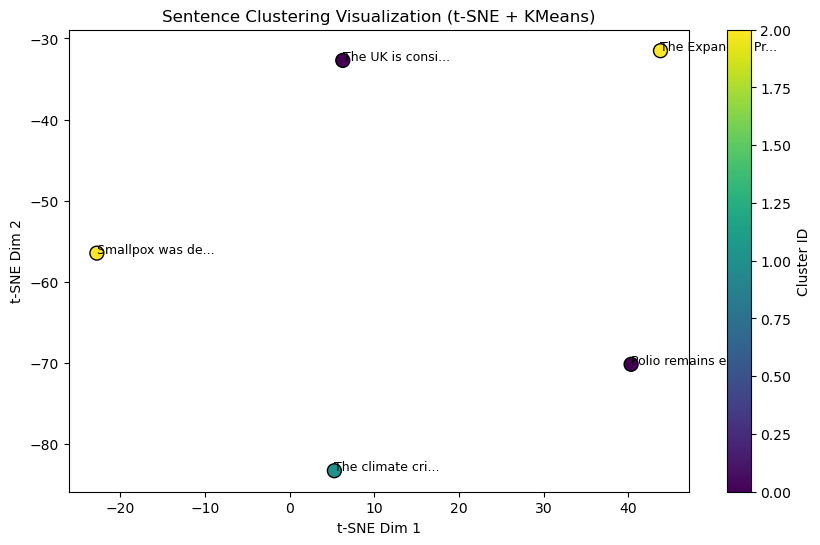

Generated Summary:
The Expanded Programme on Immunisation was launched by the WHO in 1974. The climate crisis is spurring disease outbreaks in vulnerable communities. Polio remains endemic in just a few countries, but progress is steady.

ROUGE Scores:
rouge1: Score(precision=0.7941176470588235, recall=0.4090909090909091, fmeasure=0.54)
rouge2: Score(precision=0.42424242424242425, recall=0.2153846153846154, fmeasure=0.28571428571428575)
rougeL: Score(precision=0.5588235294117647, recall=0.2878787878787879, fmeasure=0.38000000000000006)


In [1]:
import re
import numpy as np
import spacy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from rouge_score import rouge_scorer

# --- Preprocessing Functions ---
custom_stop_words = {"the", "in", "on", "of", "and", "a", "an"}

def selective_lowercase(text):
    tokens = text.split()
    processed_tokens = []
    for token in tokens:
        token_core = re.sub(r'^\W+|\W+$', '', token)
        if (token_core.isupper() and len(token_core) > 1) or re.search(r'\d', token_core):
            processed_tokens.append(token)
        else:
            processed_tokens.append(token.lower())
    return " ".join(processed_tokens)

def selective_stopword_removal(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in custom_stop_words]
    return " ".join(filtered_tokens)

def preprocess_sentence(sentence):
    sentence = selective_lowercase(sentence)
    return selective_stopword_removal(sentence)

# --- Sample Sentences ---
sentences = [
    "The Expanded Programme on Immunisation was launched by the WHO in 1974.",
    "Smallpox was declared eradicated in 1980 after a successful global vaccination campaign.",
    "The climate crisis is spurring disease outbreaks in vulnerable communities.",
    "The UK is considering a significant cut to its support for global vaccine programs.",
    "Polio remains endemic in just a few countries, but progress is steady."
]

# Preprocess sentences
preprocessed_sentences = [preprocess_sentence(sent) for sent in sentences]

# --- Embedding Setup ---
nlp = spacy.load("en_core_web_md")

def get_sentence_embedding(sentence):
    doc = nlp(sentence)
    word_vectors = [token.vector for token in doc if token.has_vector and not token.is_stop]
    return np.mean(word_vectors, axis=0) if word_vectors else doc.vector

# Get sentence embeddings
sentence_embeddings = np.array([get_sentence_embedding(sent) for sent in preprocessed_sentences])

# --- KMeans Summarization ---
def kmeans_summarization(original_sentences, embeddings, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    
    selected_sentences = []
    for i in range(n_clusters):
        cluster_indices = [j for j, label in enumerate(cluster_labels) if label == i]
        closest_idx = min(cluster_indices, key=lambda idx: np.linalg.norm(embeddings[idx] - cluster_centers[i]))
        selected_sentences.append((closest_idx, original_sentences[closest_idx]))
    
    selected_sentences.sort(key=lambda x: x[0])
    return " ".join(sent for _, sent in selected_sentences), cluster_labels

# Generate summary and cluster labels
generated_summary, cluster_labels = kmeans_summarization(sentences, sentence_embeddings, n_clusters=3)

# --- t-SNE Visualization ---
def visualize_clusters(embeddings, cluster_labels, sentences):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis', s=100, edgecolors='k')
    plt.colorbar(scatter, label="Cluster ID")
    
    for i, txt in enumerate(sentences):
        plt.annotate(txt[:15] + '...', (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9)
    
    plt.title("Sentence Clustering Visualization (t-SNE + KMeans)")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.show()

# Show visualization
visualize_clusters(sentence_embeddings, cluster_labels, sentences)

# --- ROUGE Comparison ---
provided_summary = (
    "Global immunization initiatives have achieved notable milestones, including the WHO’s launch "
    "of the Expanded Programme on Immunisation in 1974 and the eradication of smallpox in 1980. "
    "However, emerging challenges—such as disease outbreaks fueled by the climate crisis and potential funding cuts, "
    "as seen in the UK—highlight ongoing vulnerabilities. Meanwhile, steady progress continues against polio, even though "
    "it remains endemic in a few countries."
)

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(provided_summary, generated_summary)

# --- Display Results ---
print("Generated Summary:")
print(generated_summary)
print("\nROUGE Scores:")
for key, value in scores.items():
    print(f"{key}: {value}")

In [2]:
!pip install transformers sentencepiece rouge-score

from transformers import pipeline
from rouge_score import rouge_scorer

# Load the BART summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example text
text = """The Expanded Programme on Immunisation was launched by the WHO in 1974. 
Smallpox was declared eradicated in 1980 after a successful global vaccination campaign. 
The climate crisis is spurring disease outbreaks in vulnerable communities. 
The UK is considering a significant cut to its support for global vaccine programs. 
Polio remains endemic in just a few countries, but progress is steady."""

# Reference summary (gold standard)
reference_summary = """Global immunization initiatives have achieved notable milestones, including the WHO’s launch 
of the Expanded Programme on Immunisation in 1974 and the eradication of smallpox in 1980. However, emerging challenges—
such as disease outbreaks fueled by the climate crisis and potential funding cuts, as seen in the UK—highlight ongoing vulnerabilities. 
Meanwhile, steady progress continues against polio, even though it remains endemic in a few countries."""

# Generate abstractive summary
generated_summary = summarizer(text, max_length=150, min_length=30, do_sample=False)[0]['summary_text']

print("Generated Summary:")
print(generated_summary)

# Evaluate using ROUGE
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(reference_summary, generated_summary)

print("\nROUGE Scores:")
for key, value in scores.items():
    print(f"{key}: {value}")


     -------------------------------------- 991.5/991.5 kB 8.9 MB/s eta 0:00:00


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

C:\Users\Arjun\anaconda3\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Arjun\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 150, but your input_length is only 82. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)


Generated Summary:
Smallpox was declared eradicated in 1980 after a successful global vaccination campaign.Polio remains endemic in just a few countries, but progress is steady.

ROUGE Scores:
rouge1: Score(precision=0.5833333333333334, recall=0.21212121212121213, fmeasure=0.3111111111111111)
rouge2: Score(precision=0.21739130434782608, recall=0.07692307692307693, fmeasure=0.11363636363636362)
rougeL: Score(precision=0.4166666666666667, recall=0.15151515151515152, fmeasure=0.2222222222222222)


In [5]:
!pip install transformers sentencepiece rouge-score

from transformers import pipeline
from rouge_score import rouge_scorer

# Load the T5 summarization pipeline
summarizer = pipeline("summarization", model="t5-small")

# Example text
text = """The Expanded Programme on Immunisation was launched by the WHO in 1974. 
Smallpox was declared eradicated in 1980 after a successful global vaccination campaign. 
The climate crisis is spurring disease outbreaks in vulnerable communities. 
The UK is considering a significant cut to its support for global vaccine programs. 
Polio remains endemic in just a few countries, but progress is steady."""

# Reference summary (gold standard)
reference_summary = """Global immunization initiatives have achieved notable milestones, including the WHO’s launch 
of the Expanded Programme on Immunisation in 1974 and the eradication of smallpox in 1980. However, emerging challenges—
such as disease outbreaks fueled by the climate crisis and potential funding cuts, as seen in the UK—highlight ongoing vulnerabilities. 
Meanwhile, steady progress continues against polio, even though it remains endemic in a few countries."""

# Generate abstractive summary using T5
generated_summary = summarizer("summarize: " + text, max_length=150, min_length=30, do_sample=False)[0]['summary_text']

print("Generated Summary:")
print(generated_summary)

# Evaluate using ROUGE
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(reference_summary, generated_summary)

print("\nROUGE Scores:")
for key, value in scores.items():
    print(f"{key}: {value}")


Your max_length is set to 150, but your input_length is only 86. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=43)


Generated Summary:
smallpox was declared eradicated in 1980 after a successful global vaccination campaign . the climate crisis is spurring disease outbreaks in vulnerable communities .

ROUGE Scores:
rouge1: Score(precision=0.5909090909090909, recall=0.19696969696969696, fmeasure=0.29545454545454547)
rouge2: Score(precision=0.19047619047619047, recall=0.06153846153846154, fmeasure=0.09302325581395349)
rougeL: Score(precision=0.36363636363636365, recall=0.12121212121212122, fmeasure=0.18181818181818182)
